## 1. Google Play Store apps and reviews
<p>Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se están desarrollando cada vez más aplicaciones. En este ejercicio, haremos un análisis completo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información valiosa en los datos para diseñar estrategias que impulsen el crecimiento y la retención.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Tenemos dos fuentes de datos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una aplicación determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 reseñas para cada aplicación, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">reviews</a>. El texto de cada reseña se ha procesado previamente y se le atribuyen tres características nuevas: Sentimiento (positivo, negativo o neutral), Polaridad del sentimiento y Subjetividad del sentimiento..</li>
</ul>

In [1]:
# Importa las librerías de pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Importa el datase apps.csv
apps_con_duplicados = pd.read_csv('apps.csv')

# Borra todos los duplicados del dataset
apps = apps_con_duplicados.drop_duplicates()
total_apps_unicas = len(apps)

# Imprime el total de apps que se van a analizar que quedan (dimensión)
print('Total number of apps in the dataset = ', total_apps_unicas)

# Imprime la estádistica descriptiva de resumen
print(apps.describe())

# Vamos a echar un vistazo al DataFrame final
print(apps)

Total number of apps in the dataset =  9659
            Rating       Reviews         Size
count  8196.000000  9.659000e+03  8432.000000
mean      4.173243  2.165926e+05    20.395327
std       0.536625  1.831320e+06    21.827509
min       1.000000  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000
50%       4.300000  9.670000e+02    12.000000
75%       4.500000  2.940100e+04    28.000000
max       5.000000  7.815831e+07   100.000000
                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...       

## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con más frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La función <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperaríamos. Esto se debe a que la columna contiene algunos caracteres más que solo [0,9] dígitos. Idealmente, queremos que estas columnas fueran puramente numéricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Específicamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

<p>Aquí un link donde podrás ver un poco más a detalle que es una <a href="https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/">función lambda</a>

In [2]:
# Lista de caracteres a eliminar
chars_to_remove = [',', '+', '$']
# Lista de las columnas a limpiar
cols_to_clean = ['Installs', 'Price']

# Loop para cada columna
for col in cols_to_clean:
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una función lambda el caracter especial por un texto vacío ('')
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # Convierte la columna a tipo flotante (float)
    apps[col] = apps[col].astype(float)

## 3. Exploring App's categories
<p>Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas más rápida y fácilmente visibles en Google Play. Para mejorar la experiencia de búsqueda general, Google ha introducido el concepto de agrupar aplicaciones en categorías.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¿Qué categoría tiene la mayor participación de aplicaciones (activas) en el mercado?</li>
<li>¿Alguna categoría específica domina el mercado?</li>
<li>¿Qué categorías tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aquí <code>33</code> categorías unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> también están en el top.</p>

Number of categories =  33


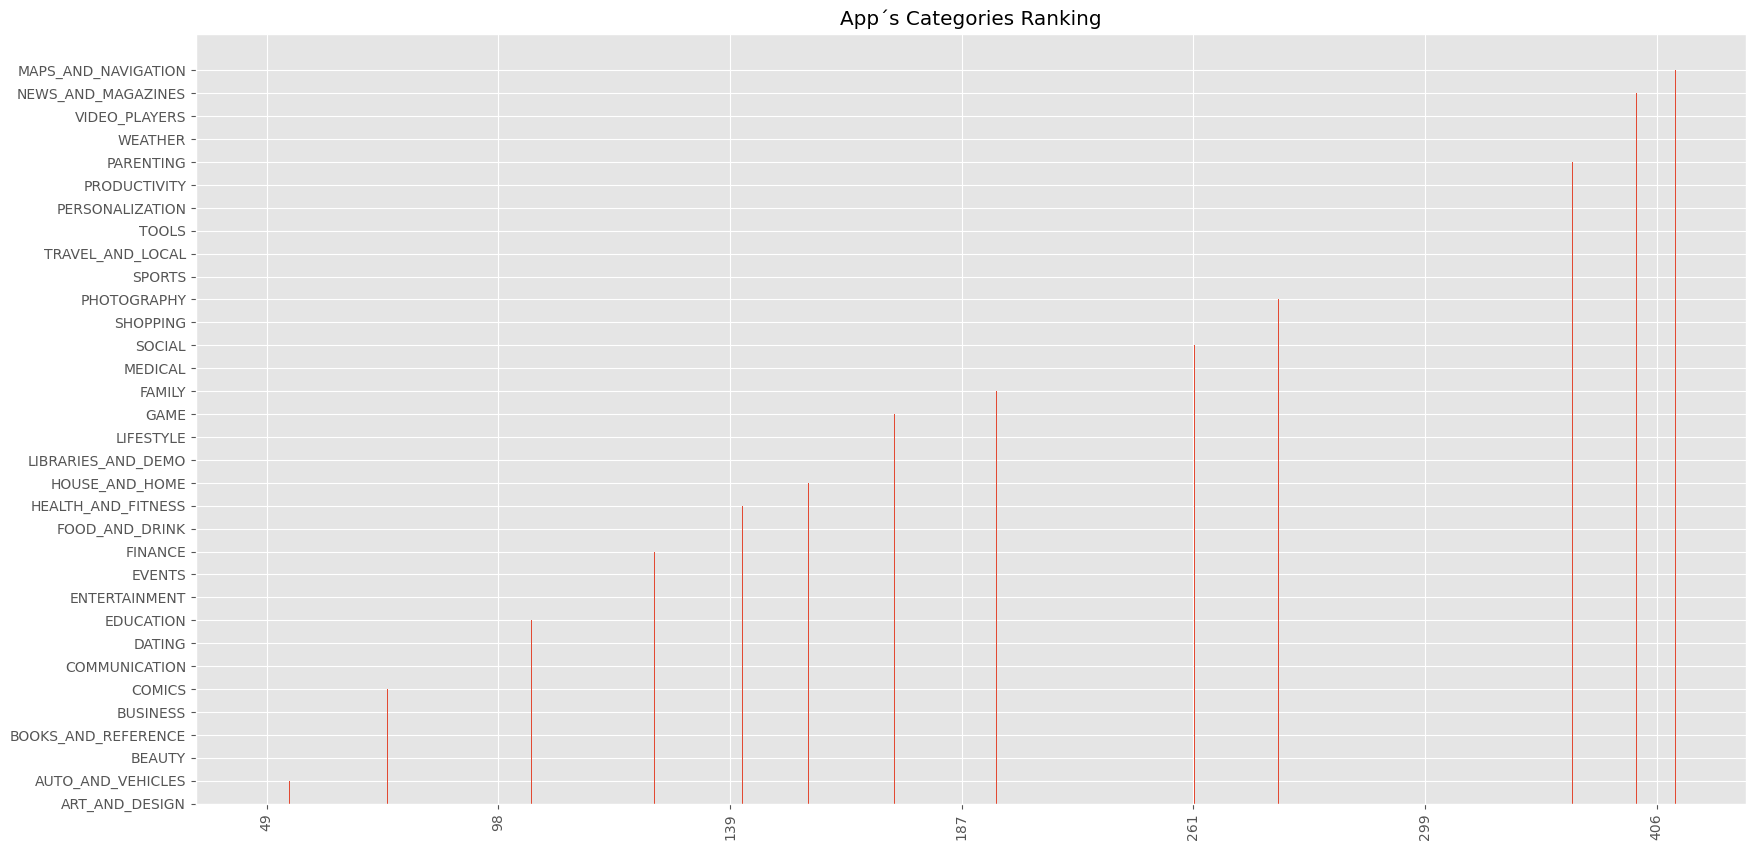

In [3]:
# Imprime el total de categorías únicas
apps = apps_con_duplicados.drop_duplicates(subset=['Category'])
num_categories = len(apps)
print('Number of categories = ', num_categories)

# Cuenta el número de aplicaciones en cada Categoría y ordea de manera descendente 
num_categories = apps['Category'].tolist()
num_apps_in_category = {category: num_categories.count(category) for category in set(num_categories)}
sorted_categories = sorted(num_apps_in_category.items(), key=lambda x: x[1], reverse=True)

# Muestra el resultado en una gráfica de barras
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(apps.index, apps['Category'])
ax.set_xticklabels(apps.index, rotation=90)
ax.set_title('App´s Categories Ranking')
plt.show()

## 4. Ratings Distribution
<p>Después de analizar la participación de mercado para cada categoría de las aplicaciones, veamos cómo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicación.</p>

Average app rating =  4.3


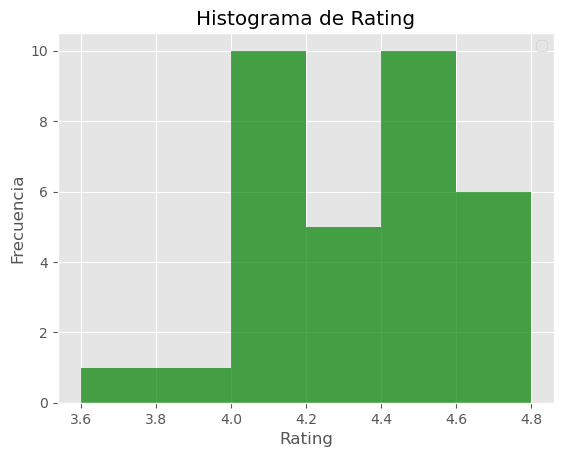

In [4]:
# Calcular el promedio de calificación de las apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Calcula el promedio de calificación por categoría
avg_app_category = apps.groupby('Category')['Rating'].mean()

# Visualiza en un histograma el comportamiento del Rating
subintervalos = int(round(len(apps) ** 0.5, 0)) 
apps['Rating'].hist(bins=subintervalos, color='green', alpha=0.7)
plt.title("Histograma de Rating")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede ser difícil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o económicas. Estos problemas se agravan si el mercado objetivo es en países en vías de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¿El tamaño de una aplicación afecta su calificación?</li>
<li>¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¿El precio de una aplicación afecta su calificación? </li>
<li>¿Los usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

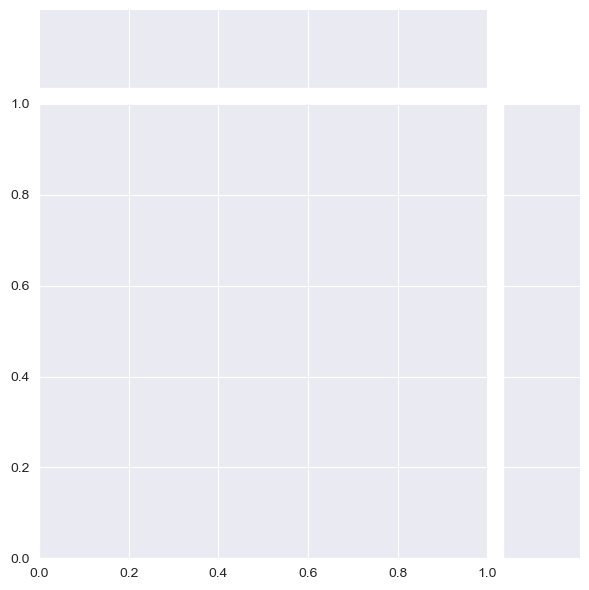

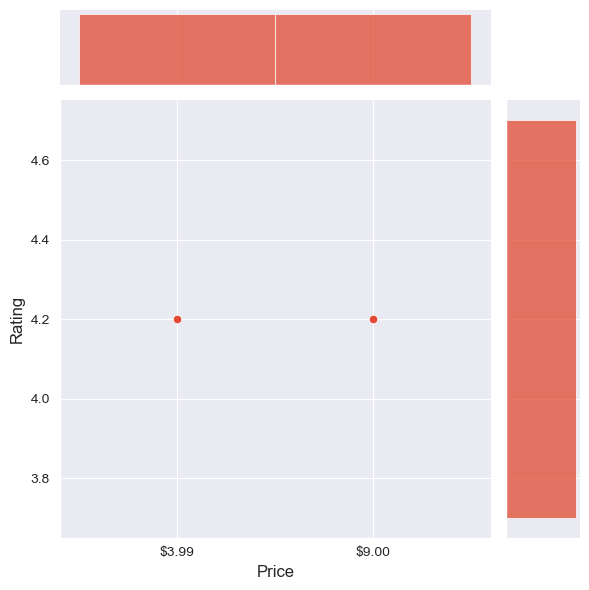

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]

# Filtra las categorías con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Gráfica size vs. rating
plt1 = sns.jointplot(x = large_categories['Rating'], y = large_categories['Size'])

# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Grafica price vs. rating de las paplicaciones de paga
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps["Rating"])
plt.show()

## 6. Relation between Category & Price
<p>Así que ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposición de su cliente a pagar por la aplicación. Un precio elevado puede hacer que los clientes no se vean atraídos por descargarlaque ocurra la descarga o pueden eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos, así que vamos a descubrir y encontrar la respuesta</p>

,Category,App,Price


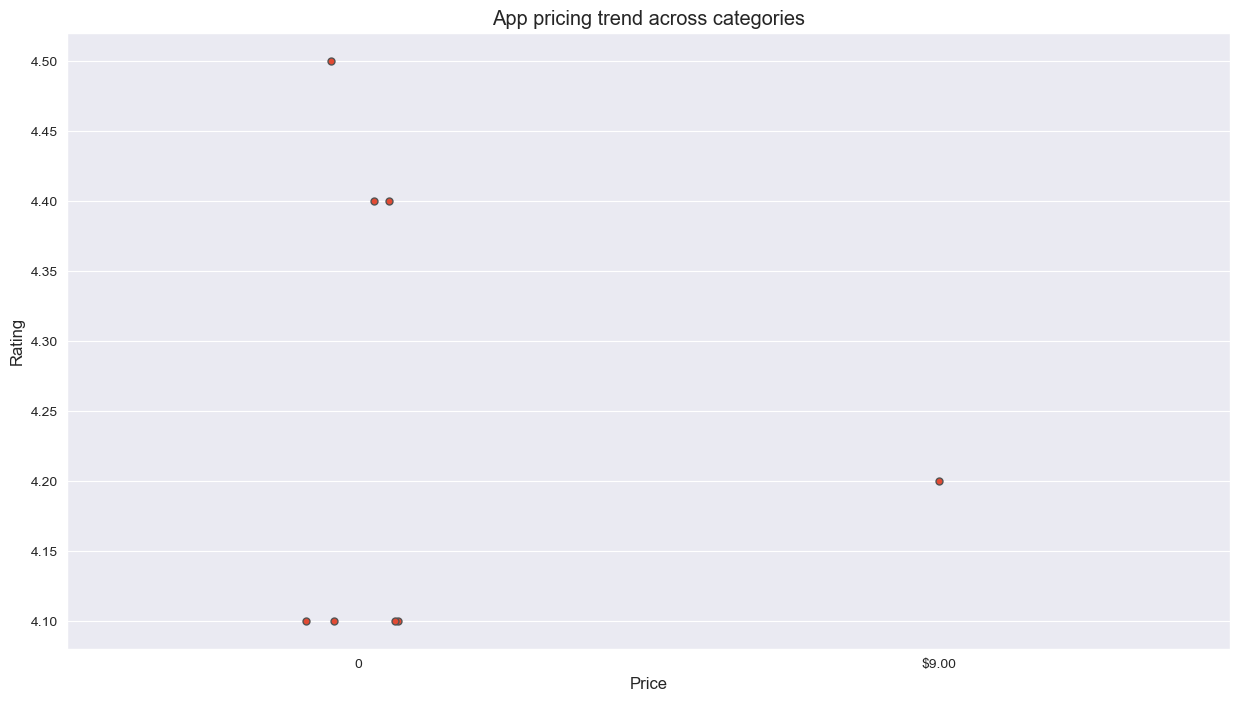

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categorías populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categoría
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Rating'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Selecciona las apps con un precio mayor a 200
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')
apps = apps.dropna(subset=['Price'])
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 7. Paid apps vs Free apps
<p>Para las aplicaciones de Play Store en la actualidad, existen cinco tipos de estrategias de precios: gratis, "freemium", de pago, "paymium" y de suscripción. Centrémonos solo en aplicaciones gratuitas y de pago. 

Algunas características de las aplicaciones gratuitas son:</p>
<ul>
<li>Libres de descarga.</li>
<li>La principal fuente de ingresos a menudo proviene de la publicidad.</li>
<li>Por lo general son creadaa por empresas que tienen otros productos y la aplicación sirve como una extensión de esos productos.</li>
<li>Puede servir como una herramienta para la retención de clientes, la comunicación y el servicio al cliente.</li>
</ul>
<p>Algunas características de las aplicaciones de paga son:</p>
<ul>
<li>Tienen un tiempo de servicio de prueba gratuito, esto para que el usuario pueda conocerla.</li>
<li>Ofrecen un servicio de mayor especialidad.</li>
</ul>
<p>¿Además de esto que otras características diferencías a las aplicaciones de pago las aplicaciones gratuitas?</p>

        Rating   Size        Reviews      Installs  Price
Type                                                     
Free  4.246667  23.48  388795.733333  1.118133e+07    0.0
Category  ART_AND_DESIGN  AUTO_AND_VEHICLES  BEAUTY  EVENTS  FAMILY  \
Type                                                                  
Free                   1                  1       1       1       1   

Category  FOOD_AND_DRINK  GAME  HEALTH_AND_FITNESS  HOUSE_AND_HOME  LIFESTYLE  \
Type                                                                            
Free                   1     1                   1               1          1   

Category  PARENTING  PHOTOGRAPHY  SHOPPING  TOOLS  TRAVEL_AND_LOCAL  
Type                                                                 
Free              1            1         1      1                 1  


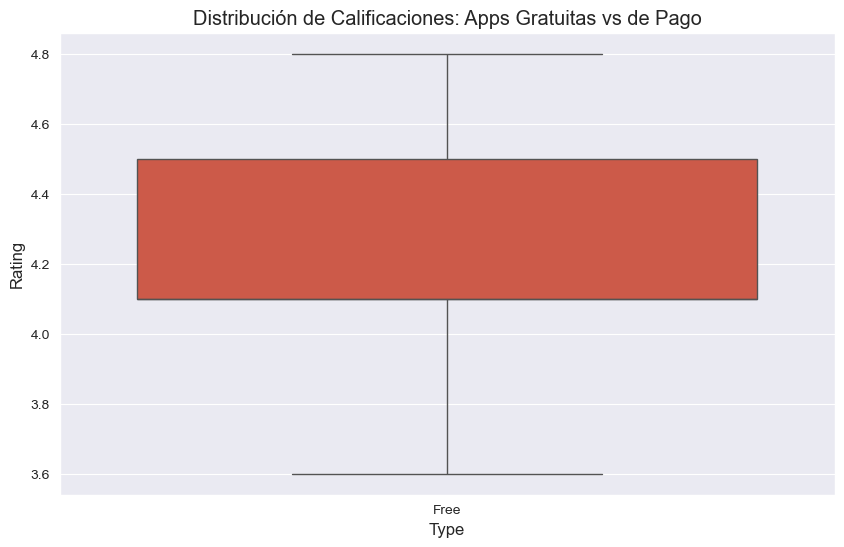

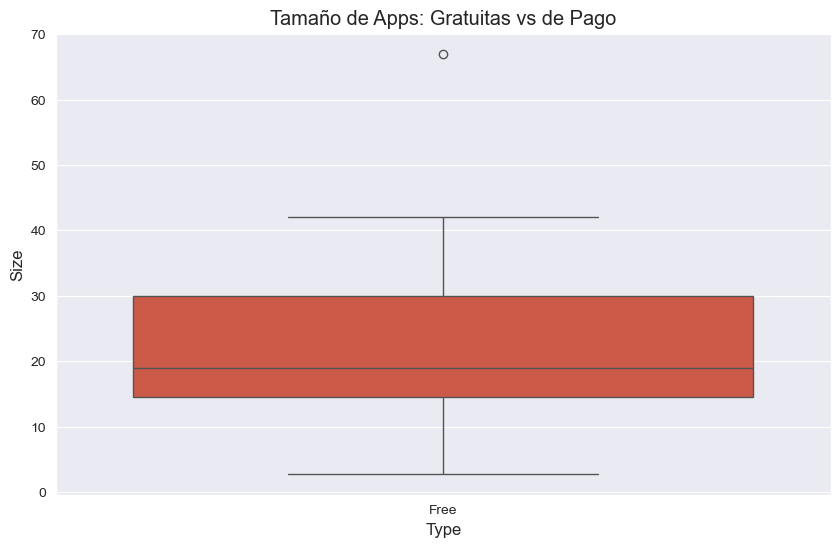

In [7]:
apps = apps.dropna(subset=['Type', 'Rating', 'Price', 'Size', 'Reviews', 'Installs'])
apps['Price'] = apps['Price'].replace('[\$]', '', regex=True).astype(float)
apps['Reviews'] = apps['Reviews'].astype(int)
apps['Installs'] = apps['Installs'].replace('[+,]', '', regex=True).astype(int)
apps['Size'] = apps['Size'].replace('M', '', regex=True)
apps['Size'] = apps['Size'].replace('Varies with device', pd.NA)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')
apps_filtrado = apps[apps['Type'].isin(['Free', 'Paid'])]
print(apps_filtrado.groupby('Type')[['Rating', 'Size', 'Reviews', 'Installs', 'Price']].mean())
print(apps_filtrado.groupby(['Type', 'Category']).size().unstack().fillna(0))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=apps_filtrado)
plt.title('Distribución de Calificaciones: Apps Gratuitas vs de Pago')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Size', data=apps_filtrado)
plt.title('Tamaño de Apps: Gratuitas vs de Pago')
plt.show()

## 8. Sentiment analysis
<p>La minería de datos de reseñas de usuarios para determinar cómo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una técnica llamada análisis de sentimientos. Las reseñas de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral con respecto a esa aplicación. Por ejemplo, las palabras positivas en la revisión de una aplicación pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

<p>¿Qué podemos decir acerca del analisis de sentimiento de las aplicaciones?</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

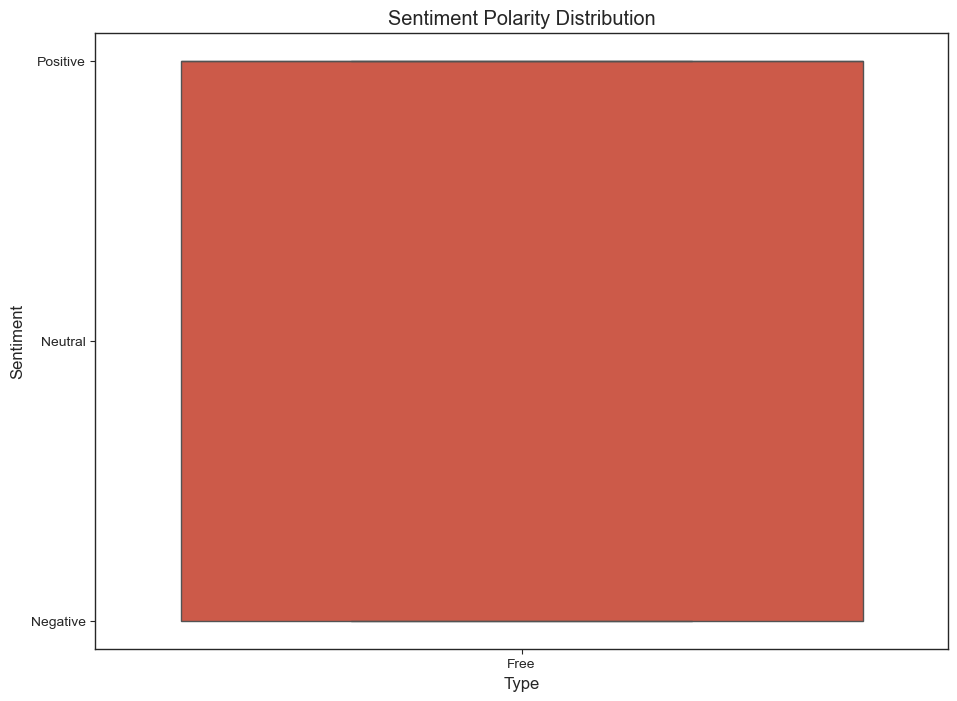

In [8]:
# Carga el archivo user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Une los dos DataFrames (join)
merged_df = pd.merge(apps, reviews_df, on="App")

# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y = 'Sentiment', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

## 9. Conclusion
<p>En este cuaderno, analizamos más de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para poder encontrar información valiosa por si alguna vez deseamos crear una aplicación nosotros mismos. Espero que hayas disfrutado el curso!!! :)
    
Atte. <a href="https://www.linkedin.com/in/ivan-alducin-a87a71108/">Ivan Alducin</a></p>